In [236]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


df = pd.read_csv('C:/Users/a236885/Desktop/HR_Employee_Attrition_Dataset.csv')
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [237]:
df.tail()


,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8
2939,2940,No,34,Travel_Rarely,628,Research & Development,8,3,Medical,1,...,1,80,0,6,3,4,4,3,1,2


In [238]:
df.shape

(2940, 35)

In [239]:
df.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [240]:
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
EmployeeNumber              2940 non-null int64
Attrition                   2940 non-null object
Age                         2940 non-null int64
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null object
EmployeeCount               2940 non-null int64
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyIncome         

In [242]:
df.Gender = pd.Categorical(df.Gender,['Male','Female'])
df.Gender = df.Gender.cat.codes

df.Over18 = pd.Categorical(df.Over18,['Y'])
df.Over18 = df.Over18.cat.codes

df.MaritalStatus = pd.Categorical(df.MaritalStatus,['Single','Married','Divorced'],ordered = True)
df.MaritalStatus = df.MaritalStatus.cat.codes

df.OverTime = pd.Categorical(df.OverTime,['Yes','No'])
df.OverTime = df.OverTime.cat.codes

df.JobRole = pd.Categorical(df.JobRole,['Sales Executive','Research Scientist','Laboratory Technician',' Manager'
' Healthcare Representative',' Manufacturing Director'],ordered = True)
df.JobRole = df.JobRole.cat.codes

df.BusinessTravel = pd.Categorical(df.BusinessTravel,['Travel_Rarely','Travel_Frequently','Non-Travel'],
                ordered = True)
df.BusinessTravel = df.BusinessTravel.cat.codes

df.Department = pd.Categorical(df.Department,['Research & Development','sales','Human Resources'],ordered = True)
df.Department = df.Department.cat.codes

df.Attrition = pd.Categorical(df.Attrition,['Yes','No'])
df.Attrition = df.Attrition.cat.codes

df.EducationField = pd.Categorical(df.EducationField,[1,2,3,4,5],ordered = True)
df.EducationField = df.EducationField.cat.codes





In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
EmployeeNumber              2940 non-null int64
Attrition                   2940 non-null int8
Age                         2940 non-null int64
BusinessTravel              2940 non-null int8
DailyRate                   2940 non-null int64
Department                  2940 non-null int8
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null int8
EmployeeCount               2940 non-null int64
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null int8
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null int8
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null int8
MonthlyIncome               2940 non

In [244]:
cdf = df[['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']].corr()
cdf

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,1.000000,0.005184,-0.005175,0.007905,-0.025742,0.014078,0.016464,0.020950,NaN,NaN,...,-0.034827,NaN,0.031226,-0.007047,0.011953,0.005370,-0.005779,-0.004427,-0.004575,-0.004716
Attrition,0.005184,1.000000,0.159205,0.000074,0.056652,0.046426,-0.077924,0.031373,NaN,NaN,...,0.045872,NaN,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
Age,-0.005175,0.159205,1.000000,-0.024751,0.010661,0.032087,-0.001686,0.208034,NaN,NaN,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,0.007905,0.000074,-0.024751,1.000000,0.004086,-0.010002,0.024469,-0.000757,NaN,NaN,...,0.035986,NaN,0.016727,-0.034226,-0.015240,0.011256,0.014575,0.011497,0.032591,0.022636
DailyRate,-0.025742,0.056652,0.010661,0.004086,1.000000,-0.014016,-0.004985,-0.016806,NaN,NaN,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.014078,0.046426,0.032087,-0.010002,-0.014016,1.000000,-0.017897,-0.002911,NaN,NaN,...,0.028802,NaN,0.008601,0.015045,-0.042157,-0.006495,-0.016036,-0.057927,-0.040672,-0.036055
DistanceFromHome,0.016464,-0.077924,-0.001686,0.024469,-0.004985,-0.017897,1.000000,0.021042,NaN,NaN,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.020950,0.031373,0.208034,-0.000757,-0.016806,-0.002911,0.021042,1.000000,NaN,NaN,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
df = df.drop(columns = ['StandardHours','EducationField','EmployeeCount'])
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,41,0,1102,-1,1,2,2,1,...,3,1,0,8,0,1,6,4,0,5
1,2,1,49,1,279,0,8,1,3,0,...,4,4,1,10,3,3,10,7,1,7
2,3,0,37,0,1373,0,2,2,4,0,...,3,2,0,7,3,3,0,0,0,0
3,4,1,33,1,1392,0,3,4,4,1,...,3,3,0,8,3,3,8,7,3,0
4,5,1,27,0,591,0,2,1,1,0,...,3,4,1,6,3,3,2,2,2,2


In [246]:
df['Attrition'].value_counts()

1    2466
0     474
Name: Attrition, dtype: int64

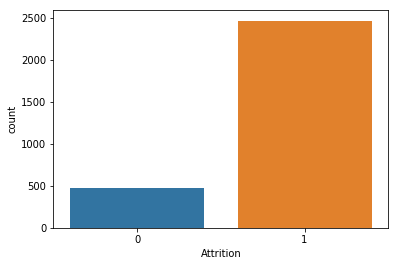

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = 'Attrition',data = df)
plt.show()

In [248]:
#x = pd.DataFrame(df.iloc[:,1:2])
X = df.drop(columns = ['Attrition'])
y = pd.DataFrame(df.iloc[:,1:2])

In [249]:
X.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,0,1102,-1,1,2,2,1,94,...,3,1,0,8,0,1,6,4,0,5
1,2,49,1,279,0,8,1,3,0,61,...,4,4,1,10,3,3,10,7,1,7
2,3,37,0,1373,0,2,2,4,0,92,...,3,2,0,7,3,3,0,0,0,0
3,4,33,1,1392,0,3,4,4,1,56,...,3,3,0,8,3,3,8,7,3,0
4,5,27,0,591,0,2,1,1,0,40,...,3,4,1,6,3,3,2,2,2,2


In [250]:
y.head()

,Attrition
0,0
1,1
2,0
3,1
4,1


In [251]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [252]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\a236885\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\a236885\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [253]:
y_pred = logmodel.predict(X_test)

In [254]:
print('Accuracy: %d', (logmodel.score(X_test, y_test)))

Accuracy: %d 0.8197278911564626


In [255]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[  1 104]
 [  2 481]]


In [256]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.01      0.02       105
           1       0.82      1.00      0.90       483

    accuracy                           0.82       588
   macro avg       0.58      0.50      0.46       588
weighted avg       0.73      0.82      0.74       588



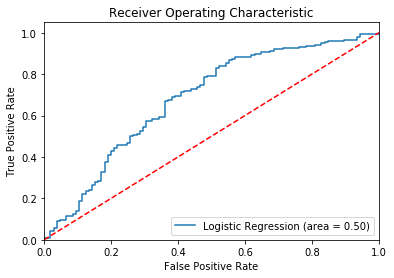

In [258]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr,tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='Logistic Regression (area = %0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.savefig('Loc_Roc')
plt.show()